In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# importing the data 

data = pd.read_csv(r'automobile_prices_economics_2019_2023.csv')

In [3]:
# Getting the gist of the data 

data.head()

data.describe()


,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
count,60,60,60,60,60,60
unique,60,17,43,46,18,49
top,19-Jan,"25,000","14,700",1.40%,0.25%,"29,000"
freq,1,12,2,3,23,4


In [4]:
data.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"


Info about the dataset. 

1. It Has 6 columns {'Month/Year', 'New Price ($)', 'Used Price ($)', 'Inflation Rate (%)',
       'Interest Rate (%)', 'Units Sold'}

2. 60 rows. with 0 null values. 


In [5]:
data.describe()



,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
count,60,60,60,60,60,60
unique,60,17,43,46,18,49
top,19-Jan,"25,000","14,700",1.40%,0.25%,"29,000"
freq,1,12,2,3,23,4


# Preprocessing 

In [6]:


data['Inflation Rate (%)'] =  data['Inflation Rate (%)'].astype(str).str.replace("%", "").astype(float)
data['Interest Rate (%)'] =  data['Interest Rate (%)'].astype(str).str.replace("%", "").astype(float)
data['New Price ($)'] = data['New Price ($)'].astype(str).str.replace(",", "").astype(float)
data['Used Price ($)'] = data['Used Price ($)'].astype(str).str.replace(",", "").astype(float)
data['Month/Year'] = pd.to_datetime(data['Month/Year'], format='%y-%b')

data['Units Sold'] = data['Units Sold'].astype(str).str.replace(",", "").astype(float)  

data.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500.0
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000.0
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500.0
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000.0
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000.0


In [7]:

# Dropping the columns that are not needed for analysis( like last row with na value in all columns)

data.dropna(how='all', inplace=True)
data

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.40,28500.0
1,2019-02-01,25000.0,17900.0,1.5,2.40,29000.0
2,2019-03-01,25000.0,17800.0,1.9,2.40,31500.0
3,2019-04-01,25000.0,17700.0,2.0,2.40,30000.0
4,2019-05-01,25000.0,17600.0,1.8,2.40,32000.0
5,2019-06-01,25000.0,17500.0,1.6,2.40,33000.0
6,2019-07-01,25000.0,17400.0,1.8,2.40,34500.0
7,2019-08-01,25000.0,17300.0,1.7,2.40,35000.0
8,2019-09-01,25000.0,17200.0,1.5,2.40,33500.0
9,2019-10-01,25000.0,17100.0,1.8,2.40,31000.0


# Inserting columns for analysis.

In [8]:
data['Year'] = data['Month/Year'].dt.year
data['Month'] = data['Month/Year'].dt.month

In [9]:
# calculating the basic statistics of the data
data.describe()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold,Year,Month
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2021-06-16 06:24:00,25543.333333,15580.000000,4.125000,2.075833,42700.000000,2021.000000,6.500000
min,2019-01-01 00:00:00,25000.000000,13800.000000,0.100000,0.250000,18000.000000,2019.000000,1.000000
25%,2020-03-24 06:00:00,25200.000000,14600.000000,1.675000,0.250000,29375.000000,2020.000000,3.750000
50%,2021-06-16 00:00:00,25400.000000,15350.000000,4.100000,2.075000,37250.000000,2021.000000,6.500000
75%,2022-09-08 12:00:00,25700.000000,16525.000000,6.250000,3.125000,55250.000000,2022.000000,9.250000
max,2023-12-01 00:00:00,27000.000000,18000.000000,9.100000,5.750000,75000.000000,2023.000000,12.000000
std,NaN,533.732195,1210.658877,2.660867,1.879923,15888.435193,1.426148,3.481184


In [10]:
# correlation between new price and used price )
correlation = data['Used Price ($)'].corr(data['New Price ($)'])
correlation 



-0.5376681188989699

Received correlation value indicates that used car price gets low as new car price goes higher.

In [11]:
print(data['New Price ($)'].mean())
print(data['Used Price ($)'].mean())

25543.333333333332
15580.0


In [12]:
corr_carPrice_infl = data['Inflation Rate (%)'].corr(data['New Price ($)'])

corr_carPrice_infl   

0.43184713004869496

car prices does not highly depend on increasing inflation rate. 

In [13]:
corr_carPrice_int = data['New Price ($)'].corr(data['Interest Rate (%)'])

corr_carPrice_int

0.6993823232154625

higher interst rates resulting higher car prices. 

higher car prices resulting higher interests.

Text(0, 0.5, 'New Price ($)')

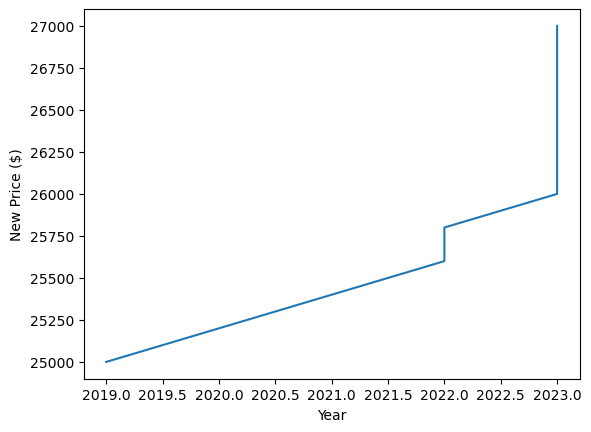

In [33]:
units_sold = plt.plot(data['Year'], data['New Price ($)'])

plt.xlabel('Year')
plt.ylabel('New Price ($)')



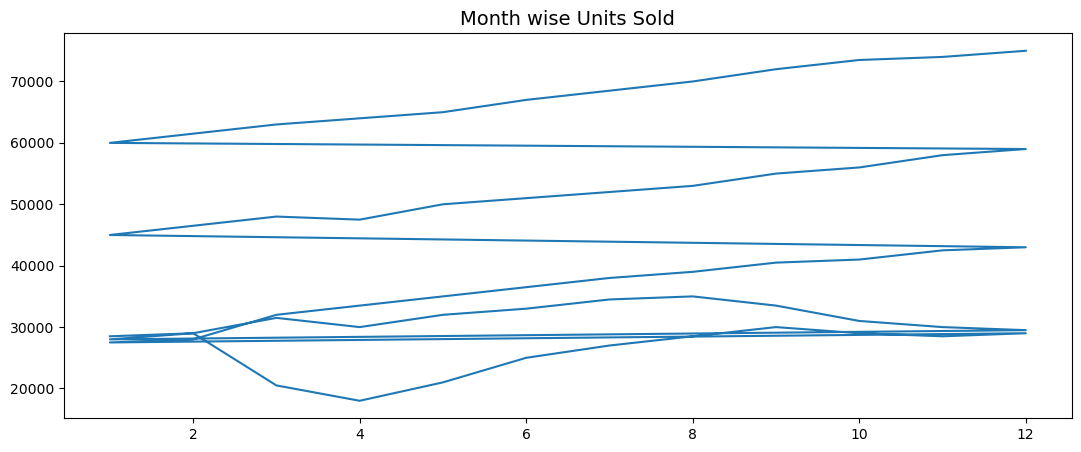

In [15]:
plt.figure(figsize=(13,5))
plt.title('Month wise Units Sold', fontsize=14)
plt.plot(data['Month'], data['Units Sold'])
plt.show()

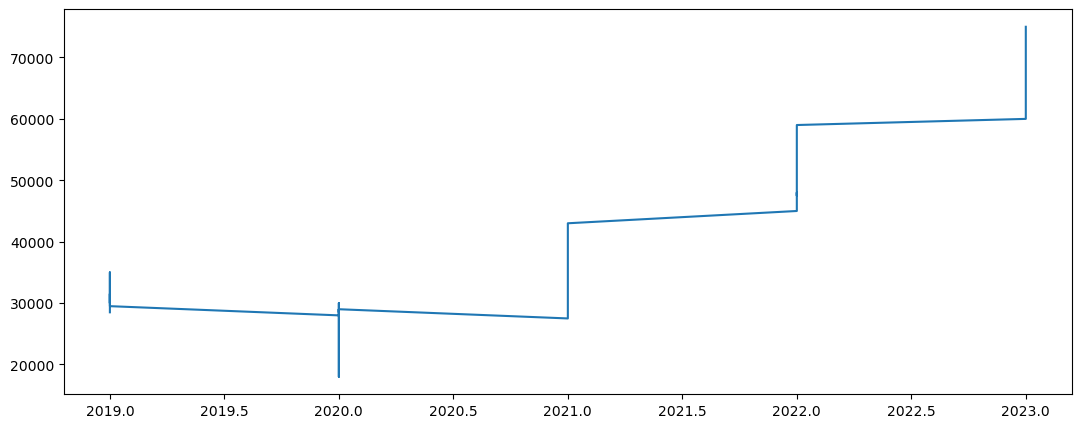

In [16]:
plt.figure(figsize=(13,5))

plt.plot(data['Year'], data['Units Sold'])

<Axes: xlabel='Year', ylabel='Units Sold'>

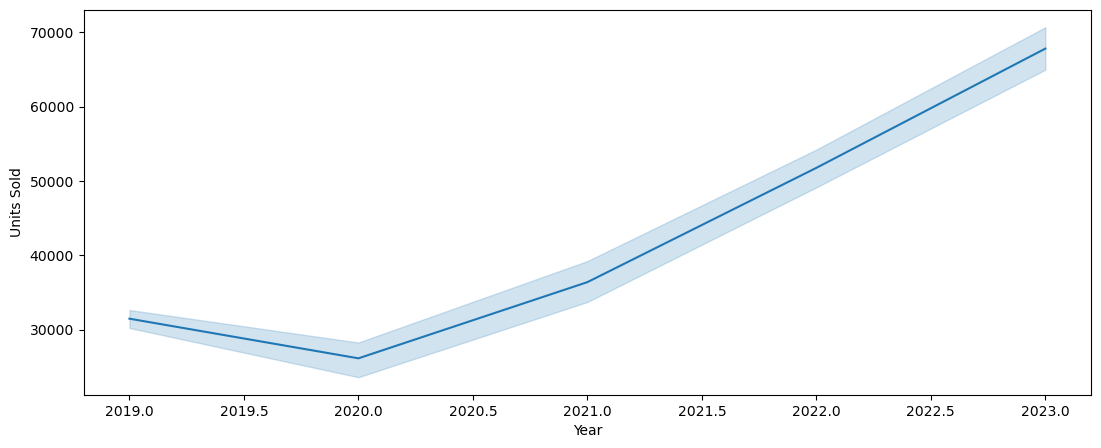

In [17]:
plt.figure(figsize=(13,5))
sns.lineplot(x=data['Year'], y=data['Units Sold'])

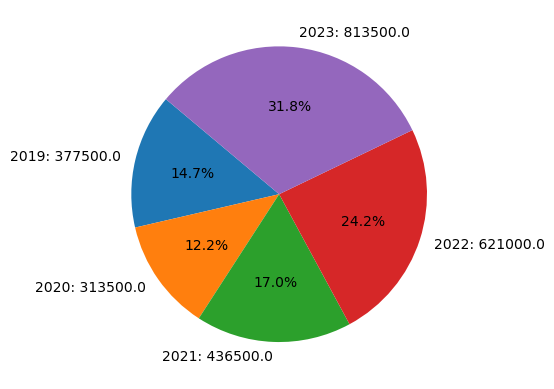

In [18]:
year_wise_unitsSold = data.groupby('Year')['Units Sold'].sum()
plt.pie(year_wise_unitsSold, labels=[f'{year}: {units}' for year, units in zip(year_wise_unitsSold.index, year_wise_unitsSold)],
  autopct='%1.1f%%', startangle=140)
plt.show()

(array([ 5., 25.,  7.,  8.,  8.,  7.]),
 array([18000., 27500., 37000., 46500., 56000., 65500., 75000.]),
 <BarContainer object of 6 artists>)

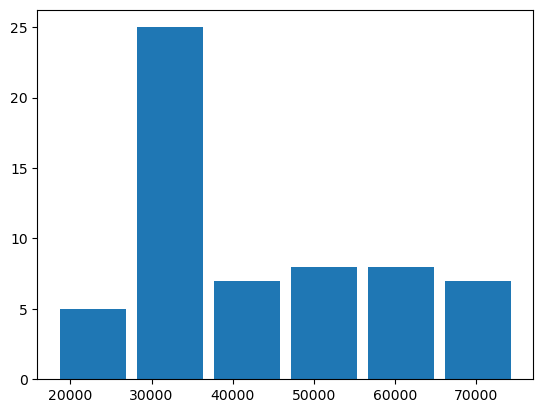

In [19]:
plt.hist(data['Units Sold'], density=False, rwidth = .85, bins=6)

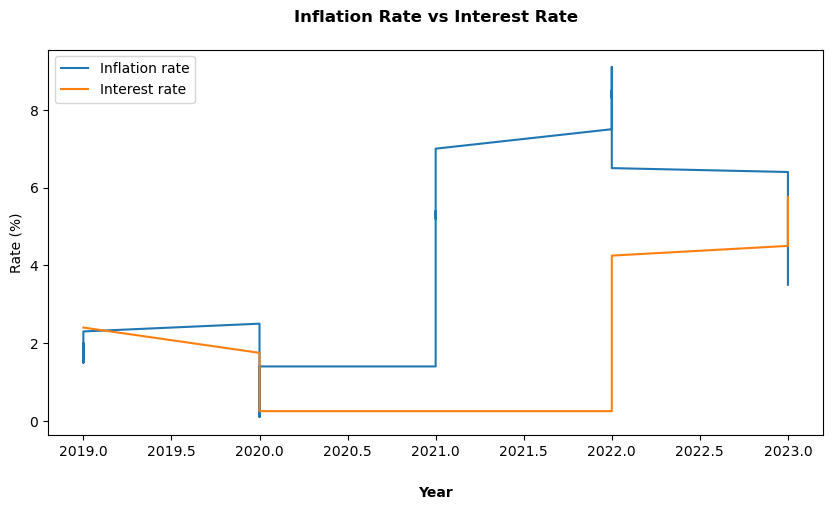

In [36]:
# Inflation vs Interest rate. 
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Inflation Rate (%)'], label='Inflation rate')
plt.plot(data['Year'],data['Interest Rate (%)'], label='Interest rate')

plt.xlabel('Year', labelpad=20, fontweight='bold')
plt.ylabel('Rate (%)')
plt.title('Inflation Rate vs Interest Rate', pad=20, fontweight='bold')

plt.legend(loc='upper left')


 Plotting Interest vs Inflation of year 2020 only.

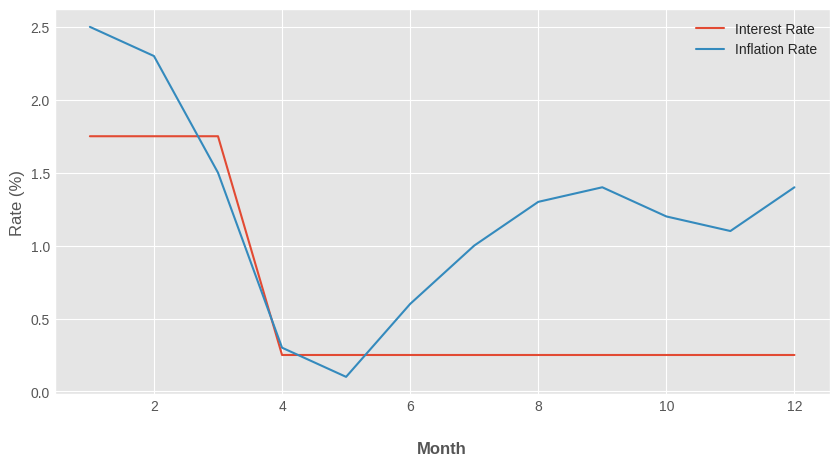

In [50]:
data_2020 = data[data['Year'] == 2020]

plt.figure(figsize=(10,5))
plt.plot(data_2020['Month'], data_2020['Interest Rate (%)'], label='Interest Rate')
plt.plot(data_2020['Month'], data_2020['Inflation Rate (%)'], label='Inflation Rate')

plt.xlabel('Month', labelpad=20, fontweight='bold')
plt.ylabel('Rate (%)')


plt.legend(loc='upper right')

Inflation Rate and Interest rate Relation 

Text(0, 0.5, 'Inflation Rate (%)')

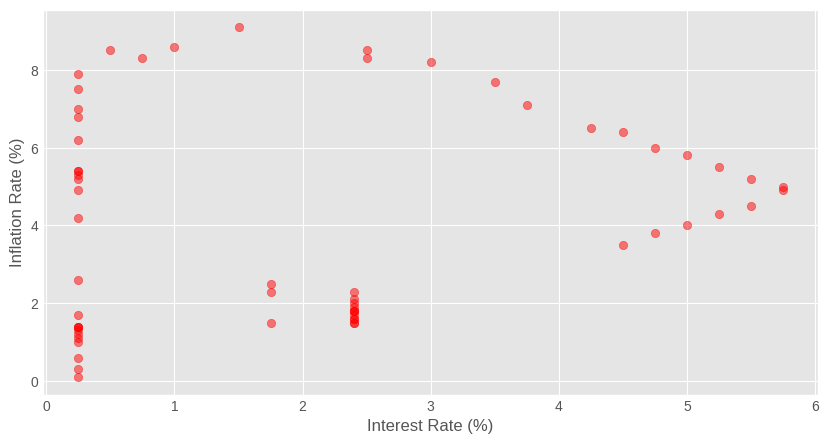

In [66]:

plt.style.use('ggplot')
plt.figure(figsize=(10,5))

plt.scatter(data['Interest Rate (%)'], data['Inflation Rate (%)'], c='red', alpha=0.5)

plt.xlabel('Interest Rate (%)')
plt.ylabel('Inflation Rate (%)')    

array([[<Axes: title={'center': 'Month/Year'}>,
        <Axes: title={'center': 'New Price ($)'}>,
        <Axes: title={'center': 'Used Price ($)'}>],
       [<Axes: title={'center': 'Inflation Rate (%)'}>,
        <Axes: title={'center': 'Interest Rate (%)'}>,
        <Axes: title={'center': 'Units Sold'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>, <Axes: >]], dtype=object)

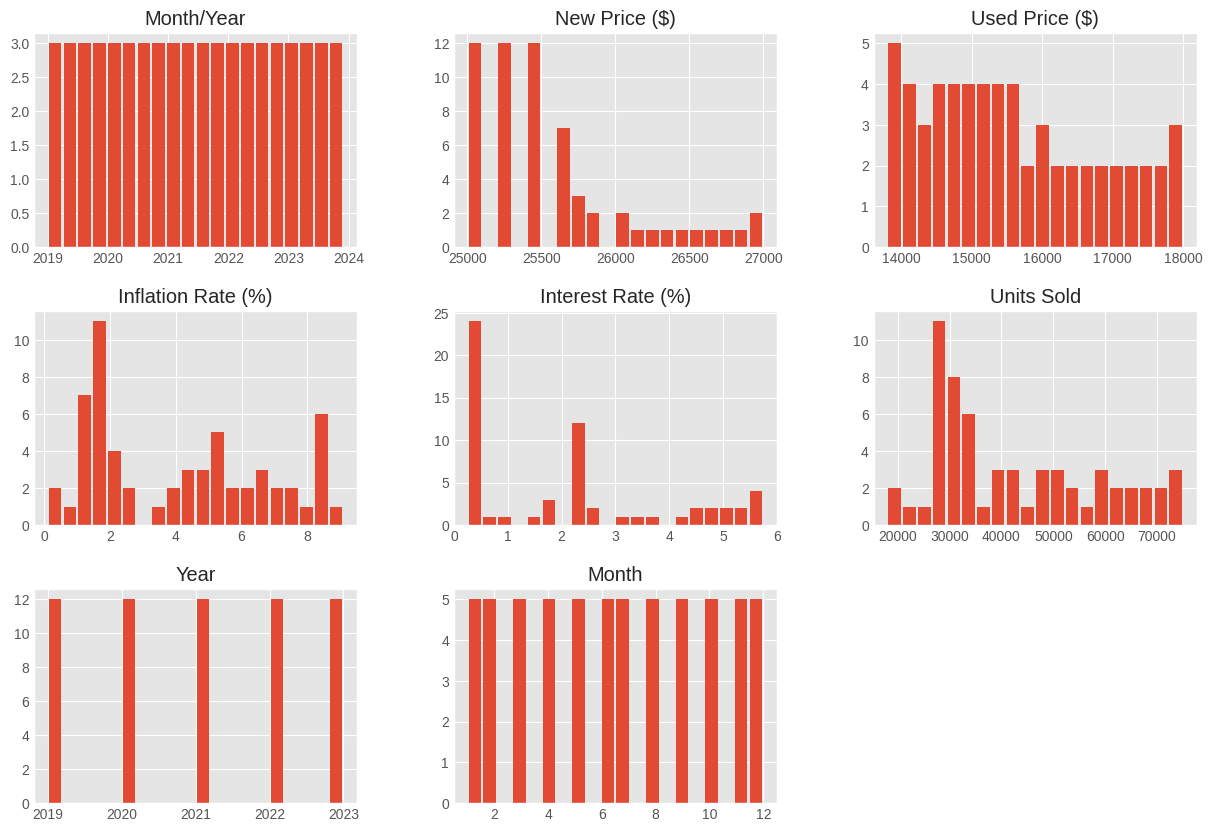

In [67]:
data.hist(figsize=(15,10), bins=20, rwidth=0.85)

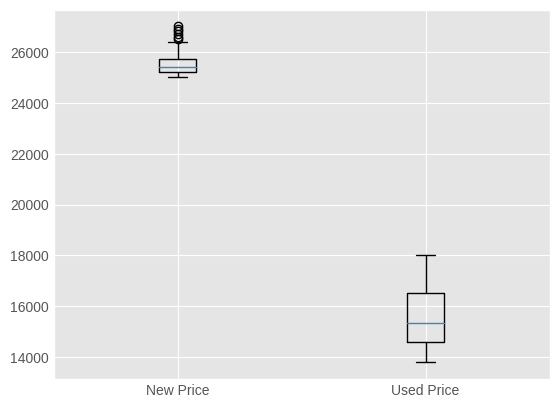

In [77]:
plt.boxplot((data['New Price ($)'], data['Used Price ($)']), labels=['New Price', 'Used Price'])

plt.show()

(array([25400., 25400.]), array([0.925, 1.075]))
(array([15350., 15350.]), array([1.925, 2.075]))


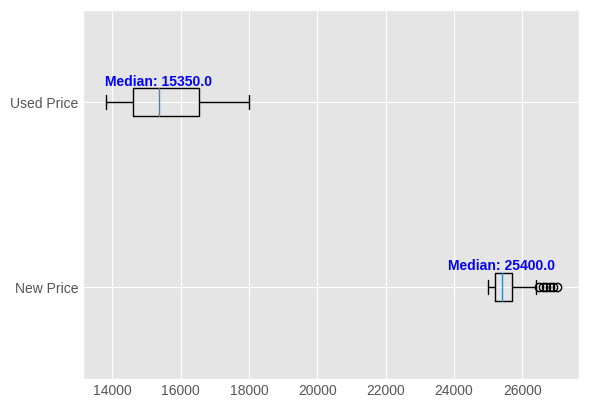

[25400.0, 15350.0]

In [117]:
bxplot = plt.boxplot((data['New Price ($)'], data['Used Price ($)']),labels=['New Price', 'Used Price'], vert=False)

medians  = [np.median(data['New Price ($)']), data['Used Price ($)'].median()]

for i, line in enumerate(bxplot['medians']):
    print(line.get_data())
    x, y = line.get_xydata()[1]  # Get median line position
    plt.text(x, y, f'Median: {medians[i]:.1f}', 
             horizontalalignment='center',
             verticalalignment='bottom',
             color='blue', fontweight='bold')
    

plt.show()
medians


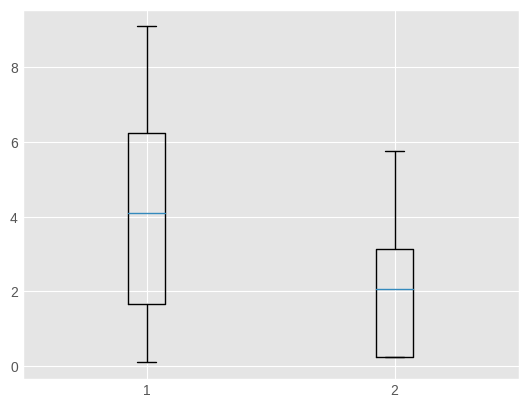

In [ ]:
plt.boxplot((data['Inflation Rate (%)'], data['Interest Rate (%)']))
plt.show()

